In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def is_time_between(start, end):
    now = datetime.now().time()
    return start <= now <= end

In [3]:
start_time = datetime.strptime("17:00", "%H:%M").time()
end_time = datetime.strptime("19:00", "%H:%M").time()

In [4]:
data = pd.read_csv('googleplaystore.csv (2).zip')

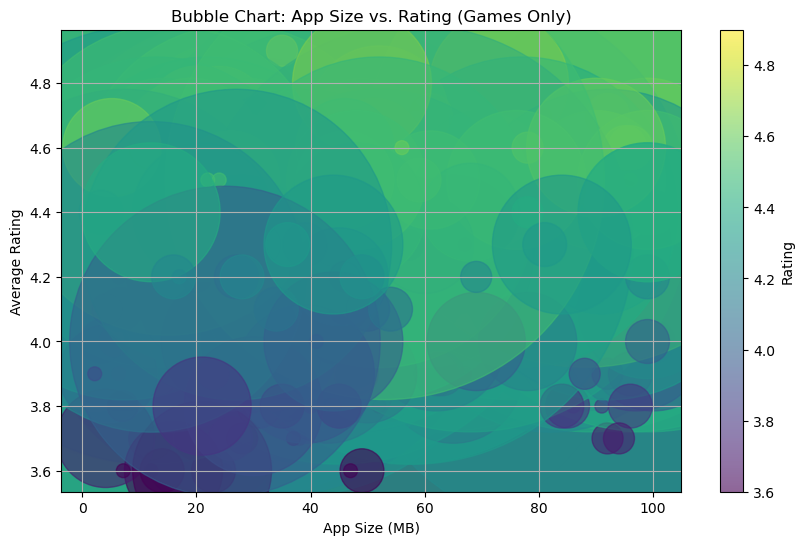

In [16]:
if is_time_between(start_time, end_time):
    data['Size'] = data['Size'].replace('Varies with device', np.nan) 
    data['Size'] = data['Size'].dropna().astype(str).str.replace(r'[a-zA-Z,]', '', regex=True)
    data['Size'] = pd.to_numeric(data['Size'], errors='coerce')  

    data['Installs'] = data['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
    data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')  


    filtered_data = data[(data['Category'] == 'GAME') & (data['Rating'] > 3.5) & (data['Installs'] > 50000) & 
                         ~data['Size'].isna()]

   
    if not filtered_data.empty:
        
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            filtered_data['Size'],  
            filtered_data['Rating'],  
            s=filtered_data['Installs'] / 1000, 
            alpha=0.6,
            c=filtered_data['Rating'],  
            cmap='viridis'
        )
        

        plt.colorbar(scatter, label='Rating')
        plt.xlabel('App Size (MB)')
        plt.ylabel('Average Rating')
        plt.title('Bubble Chart: App Size vs. Rating (Games Only)')
        plt.grid(True)
        plt.show()
    else:
        print("No data matches the filtering criteria.")
else:
    print("This analysis is only available between 5 PM and 7 PM.")